In [4]:
import cv2 as cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# ruta para colab
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/imagenes"
os.chdir(path)

# ruta en local
# os.chdir("../datos/imagenes")

In [7]:
imagen = cv2.imread("caras.jpg")

In [8]:
def mostrar(imagen):
    # cambiar a RGB
    if(len(imagen.shape)==3):
        imagen = imagen[...,::-1]
    plt.imshow(imagen)
    plt.show()

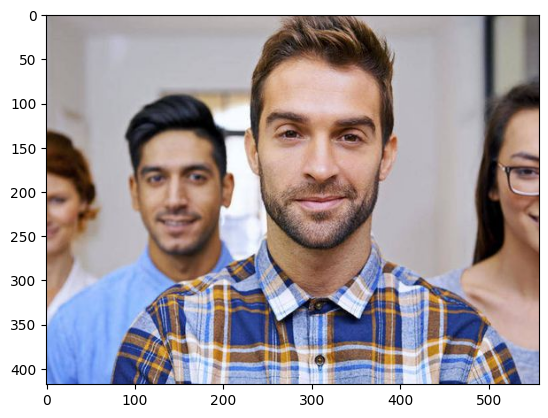

In [9]:
mostrar(imagen)

In [10]:
# cargar el detector de caras
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)

# busca las caras y devuelve un array
faces = face_cascade.detectMultiScale(gris, 1.3, 2)
faces

# cada elemento del array es un rectángulo en formato xmin, ymin, ancho, alto

array([[214,  60, 199, 199],
       [ 85, 137, 125, 125]], dtype=int32)

In [11]:
# cargar sonrisas
sonrisas_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_smile.xml")


para una de las caras, buscar la sonrisa

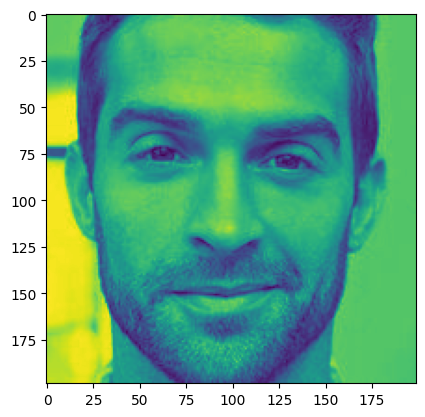

In [12]:
# mostramos la cara
cara = faces[0]
trozo_cara = gris[ cara[1]: cara[1] + cara[3], cara[0]:cara[0] + cara [2]]

# para el ejercicio 2 de la entrega 3
# blur(trozo_cara)
# gris[ cara[1]: cara[1] + cara[3], cara[0]:cara[0] + cara [2]] = trozo_cara

mostrar(trozo_cara)

In [13]:
sonrisas = sonrisas_cascade.detectMultiScale(trozo_cara, 1.1, 20)
sonrisas

array([[ 57, 134,  80,  40]], dtype=int32)

In [14]:
sonrisa = sonrisas[0]

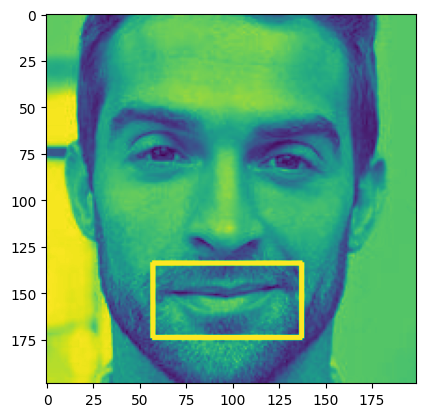

In [15]:
# xmin = 57;  ymin = 134; |x| = 80; |y| = 40
cv2.rectangle(trozo_cara, (sonrisa[0], sonrisa[1]),  (sonrisa[0] + sonrisa[2], sonrisa[1] + sonrisa[3]), (255,0,0),2 )

mostrar(trozo_cara)